In [21]:
import numpy as np
import utility
import random

from full_qubo_solver import FullQuboSolver
from qubo_solver import QuboSolver
from routes import Route
from PIL import Image, ImageDraw

In [2]:
n = 5
m = 2
seed = 1543

In [3]:
dist_matrix = np.array([
    [0, 294, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, 273, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1],
    [294, 0, 348, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, 278, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1],
    [-1, 348, 0, 333, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     278, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1],
    [-1, -1, 333, 0, 514, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 280,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1],
    [-1, -1, -1, 514, 0, 417, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 308, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1],
    [-1, -1, -1, -1, 417, 0, 564, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 302, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1, 564, 0, 684, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 419, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1, -1, 684, 0, 205, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 466, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1, -1, -1, 205, 0, 337, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 443, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1, -1, -1, -1, 337, 0, 400, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 225, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1, -1, -1, -1, -1, 400, 0, 512, -1, -1, -1, -1, -1, -1, -1, -1, -1, 225, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 512, 0, 381, -1, -1, -1, -1, -1, -1, -1, 215, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 381, 0, 388, -1, -1, -1, -1, -1, 221, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 388, 0, -1, -1, -1, -1, 219, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 0, -1, 342, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 0, 371, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 342, 371, 0, 414, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 190, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 414, 0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 219, -1, -1, -1, -1, 0, 381, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 297, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 221, -1, -1, -1, -1, -1, 381, 0, 377, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 293, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 215, -1, -1, -1, -1, -1, -1, -1, 377, 0, 503, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 297, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 225, -1, -1, -1, -1, -1, -1, -1, -1, -1, 503, 0, 394, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 302, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1, -1, -1, -1, -1, 225, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 394, 0, 290, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 328, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1, -1, -1, 466, 443, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 290, 0, 638, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 286, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1, -1, 419, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 638, 0, 340, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, 314, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1, 302, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 340, 0, 365, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, 345, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1],
    [-1, -1, -1, -1, 308, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 365, 0, 525,
     -1, -1, -1, -1, -1, -1, -1, 305, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1],
    [-1, -1, -1, 280, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 525, 0,
     324, -1, -1, -1, -1, -1, 330, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1],
    [-1, -1, 278, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 324,
     0, 334, -1, -1, -1, 310, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1],
    [-1, 278, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     334, 0, 293, -1, 313, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1],
    [273, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, 293, 0, 312, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, 312, 0, 329, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, 333, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     313, -1, 329, 0, 335, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, 318, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     310, -1, -1, -1, 335, 0, 327, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, 311, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 330,
     -1, -1, -1, -1, -1, 327, 0, 518, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, 316, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 305, -1,
     -1, -1, -1, -1, -1, -1, 518, 0, 226, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, 315, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 345, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, 226, 0, 239, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, 344, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 314, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, 239, 0, 595, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, 326, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 286, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, 595, 0, 213, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, 350, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 328, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 213, 0, 372, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, 348, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 302, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 372, 0, 502, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     315, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 297, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 502, 0, 383, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 320,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 293, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 383, 0, 382, -1, -1, -1, -1, -1, -1, -1, -1, -1, 312, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 297, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 382, 0, -1, -1, -1, -1, -1, -1, -1, -1, 310, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 0, 225, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 225, 0, 512, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 190, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 512, 0, 495, -1, 237, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 495, 0, 239, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 239, 0, 505, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 338, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 237, -1, 505, 0, 516, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 346, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 516, 0, 640, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 334, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 640, 0, 237, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 360, 406, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 310, -1, -1, -1, -1, -1, -1, -1, 237, 0, 374, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 312, -1, -1, -1, -1, -1, -1, -1, -1, -1, 374, 0, 136, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 136, 0, 246, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 229, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 320, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 246, 0, 509,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 240, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 315, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 509, 0,
     205, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 228, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, 350, 348, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 205,
     0, 555, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 225, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, 326, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     555, 0, 114, -1, -1, -1, -1, -1, -1, -1, -1, -1, 217, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, 344, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, 114, 0, 109, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, 315, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, 109, 0, 507, -1, -1, -1, -1, -1, -1, -1, 234, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, 316, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, 507, 0, 330, -1, -1, -1, -1, -1, 239, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, 311, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, 330, 0, 343, -1, -1, -1, 221, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, 318, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, 343, 0, 371, -1, 243, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, 333, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, 371, 0, 242, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, 242, 0, 344, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 214, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, 243, -1, 344, 0, 322, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 420, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, 221, -1, -1, -1, 322, 0, 328, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, 428, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, 239, -1, -1, -1, -1, -1, 328, 0, 524, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     421, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     217, -1, 234, -1, -1, -1, -1, -1, -1, -1, 524, 0, 558, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 228,
     225, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 558, 0, 555, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 240, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 555, 0, 248, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 427,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 229, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 248, 0, 143, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 360, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 143, 0, -1, -1, -1, -1, -1, -1, -1, -1, -1, 402, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 406, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 0, -1, -1, -1, -1, -1, -1, -1, 403, 385, -1,
     -1, -1, -1, -1, -1, -1, 366, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 0, 566, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 334, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 566, 0, 500, -1, -1, -1, 400, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 346, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 500, 0, 534, -1, 392, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 338, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 534, 0, 306, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 306, 0, 581, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 392, -1, 581, 0, 536, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 400, -1, -1, -1, 536, 0, 705, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 403, -1, -1, -1, -1, -1, -1, 705, 0, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, 325, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 324, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 402, 385, -1, -1, -1, -1, -1, -1, -1, -1, 0, 376, -1,
     -1, -1, -1, -1, -1, 255, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 427, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 376, 0, 350,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 350, 0,
     368, -1, -1, -1, 493, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 421, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 368,
     0, 336, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, 428, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     336, 0, 225, -1, -1, -1, -1, -1, -1, -1, -1, 345, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     225, 0, 210, -1, -1, -1, -1, -1, -1, 333, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, 210, 0, 372, -1, -1, -1, -1, 321, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 493,
     -1, -1, -1, 372, 0, 516, -1, 357, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 366, -1, -1, -1, -1, -1, -1, -1, -1, 255, -1, -1,
     -1, -1, -1, -1, 516, 0, 364, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 325, -1, -1, -1,
     -1, -1, -1, -1, -1, 364, 0, 374, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 345, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, 357, -1, 374, 0, 388, -1, -1, -1, -1, -1, -1, -1, -1, 350, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, 388, 0, 226, -1, -1, -1, -1, -1, -1, 314, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, 321, -1, -1, -1, -1, 226, 0, 237, -1, -1, -1, -1, 312, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, 333, -1, -1, -1, -1, -1, -1, 237, 0, 154, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, 420, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, 345, -1, -1, -1, -1, -1, -1, -1, -1, 154, 0, -1, -1, 434, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, 214, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 0, 185, 224, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 185, 0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 713, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 434, 224, -1, 0, 516, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, 312, -1, -1, -1, -1, 516, 0, 455, -1, -1, -1, -1, -1, -1, -1, 366, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, 314, -1, -1, -1, -1, -1, -1, 455, 0, 387, -1, -1, -1, -1, -1, 336, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, 350, -1, -1, -1, -1, -1, -1, -1, -1, 387, 0, 433, -1, -1, -1, 327, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, 345, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 433, 0, 313, -1, 334, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 324, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 313, 0, 342, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 342, 0, 268, -1, -1, -1, -1, -1, -1, 343,
     -1, -1, -1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 334, -1, 268, 0, 407, -1, -1, -1, -1, 356, -1,
     -1, -1, -1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 327, -1, -1, -1, 407, 0, 388, -1, -1, 348, -1, -1,
     -1, -1, -1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 336, -1, -1, -1, -1, -1, 388, 0, -1, 466, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 713, -1, 366, -1, -1, -1, -1, -1, -1, -1, -1, 0, 477, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 466, 477, 0, -1, -1, -1,
     -1, -1, -1, -1, 500, -1, -1],
    [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 348, -1, -1, -1, 0, 369, -1,
     -1, -1, -1, 326, -1, -1, -1],
    [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 356, -1, -1, -1, -1, 369, 0, 224,
     -1, 341, -1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 343, -1, -1, -1, -1, -1, -1, 224, 0,
     327, -1, -1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 327, 0,
     198, -1, -1, -1, -1, 650],
    [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 341, -1,
     198, 0, 155, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     155, 0, 184, -1, 511, -1],
    [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 326, -1, -1,
     -1, -1, 184, 0, 373, -1, -1],
    [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 500, -1, -1, -1,
     -1, -1, -1, 373, 0, 175, -1],
    [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, 511, -1, 175, 0, 436],
    [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
     650, -1, -1, -1, -1, 436, 0],
])

In [4]:
print(dist_matrix.shape)

(122, 122)


In [5]:
coordinates = [{'latitude': 22.59257785, 'longitude': 88.39495508}, {'latitude': 22.59380613, 'longitude': 88.39813082}, {'latitude': 22.59582682, 'longitude': 88.40139238}, {'latitude': 22.59687855, 'longitude': 88.40372944}, {'latitude': 22.5993924, 'longitude': 88.40792128}, {'latitude': 22.60180698, 'longitude': 88.41175485}, {'latitude': 22.60223697, 'longitude': 88.41626914}, {'latitude': 22.60124468, 'longitude': 88.42289728}, {'latitude': 22.60021932, 'longitude': 88.42458118}, {'latitude': 22.5976724, 'longitude': 88.42640839}, {'latitude': 22.5945962, 'longitude': 88.42837892}, {'latitude': 22.5906268, 'longitude': 88.43088686}, {'latitude': 22.587782, 'longitude': 88.43289321}, {'latitude': 22.58487097, 'longitude': 88.43489957}, {'latitude': 22.58126519, 'longitude': 88.4372642}, {'latitude': 22.57683226, 'longitude': 88.43869731}, {'latitude': 22.57818862, 'longitude': 88.43550864}, {'latitude': 22.57987578, 'longitude': 88.43167507}, {'latitude': 22.58371316, 'longitude': 88.43317984}, {'latitude': 22.58665729, 'longitude': 88.43110183}, {'latitude': 22.58956828, 'longitude': 88.42909547}, {'latitude': 22.59340539, 'longitude': 88.42651588}, {'latitude': 22.59648162, 'longitude': 88.42440204}, {'latitude': 22.59717625, 'longitude': 88.42178662}, {'latitude': 22.59846625, 'longitude': 88.41566007}, {'latitude': 22.59906163, 'longitude': 88.41229227}, {'latitude': 22.59727548, 'longitude': 88.40939022}, {'latitude': 22.59482774, 'longitude': 88.40501924}, {'latitude': 22.59314077, 'longitude': 88.40233216}, {'latitude': 22.591553, 'longitude': 88.39960925}, {'latitude': 22.58996522, 'longitude': 88.39695799}, {'latitude': 22.58758352, 'longitude': 88.39842693}, {'latitude': 22.58913825, 'longitude': 88.40136481}, {'latitude': 22.59062891, 'longitude': 88.40406996}, {'latitude': 22.59235801, 'longitude': 88.40679178}, {'latitude': 22.59487094, 'longitude': 88.41106179}, {'latitude': 22.59590838, 'longitude': 88.41290964}, {'latitude': 22.59583921, 'longitude': 88.41525689}, {'latitude': 22.59477964, 'longitude': 88.42088504}, {'latitude': 22.59400642, 'longitude': 88.42276941}, {'latitude': 22.59201813, 'longitude': 88.42405557}, {'latitude': 22.58809668, 'longitude': 88.42662789}, {'latitude': 22.58525218, 'longitude': 88.4286319}, {'latitude': 22.58229715, 'longitude': 88.43060601}, {'latitude': 22.58014393, 'longitude': 88.42853125}, {'latitude': 22.57885037, 'longitude': 88.43017026}, {'latitude': 22.57681938, 'longitude': 88.43471027}, {'latitude': 22.57473519, 'longitude': 88.43908126}, {'latitude': 22.57284947, 'longitude': 88.43818556}, {'latitude': 22.57483444, 'longitude': 88.43377875}, {'latitude': 22.57681938, 'longitude': 88.42908532}, {'latitude': 22.57945945, 'longitude': 88.42624283}, {'latitude': 22.58086796, 'longitude': 88.42803747}, {'latitude': 22.5837454, 'longitude': 88.42608779}, {'latitude': 22.58463857, 'longitude': 88.42537123}, {'latitude': 22.58662337, 'longitude': 88.42415309}, {'latitude': 22.59039441, 'longitude': 88.42153767}, {'latitude': 22.59155216, 'longitude': 88.42031952}, {'latitude': 22.5928753, 'longitude': 88.4147304}, {'latitude': 22.59290838, 'longitude': 88.41354808}, {'latitude': 22.59244528, 'longitude': 88.41268822}, {'latitude': 22.58989822, 'longitude': 88.40842471}, {'latitude': 22.58831444, 'longitude': 88.40573112}, {'latitude': 22.5866775, 'longitude': 88.40295936}, {'latitude': 22.58460249, 'longitude': 88.39923871}, {'latitude': 22.58285023, 'longitude': 88.40023754}, {'latitude': 22.58494832, 'longitude': 88.40408305}, {'latitude': 22.58656222, 'longitude': 88.40687978}, {'latitude': 22.58811532, 'longitude': 88.40965743}, {'latitude': 22.59060527, 'longitude': 88.41390247}, {'latitude': 22.58956151, 'longitude': 88.4192606}, {'latitude': 22.58540226, 'longitude': 88.4220618}, {'latitude': 22.58357954, 'longitude': 88.42349752}, {'latitude': 22.58253009, 'longitude': 88.42412564}, {'latitude': 22.57772459, 'longitude': 88.42268993}, {'latitude': 22.5765478, 'longitude': 88.42320881}, {'latitude': 22.57409093, 'longitude': 88.42767201}, {'latitude': 22.57207909, 'longitude': 88.43234355}, {'latitude': 22.57003072, 'longitude': 88.43688354}, {'latitude': 22.56724063, 'longitude': 88.43600956}, {'latitude': 22.56890533, 'longitude': 88.43057696}, {'latitude': 22.5709658, 'longitude': 88.42610975}, {'latitude': 22.5745918, 'longitude': 88.42118733}, {'latitude': 22.58060609, 'longitude': 88.42073825}, {'latitude': 22.58341796, 'longitude': 88.4187319}, {'latitude': 22.58398033, 'longitude': 88.41525661}, {'latitude': 22.58484042, 'longitude': 88.41185297}, {'latitude': 22.58328564, 'longitude': 88.40916589}, {'latitude': 22.58192933, 'longitude': 88.40998993}, {'latitude': 22.5804076, 'longitude': 88.41106476}, {'latitude': 22.57977906, 'longitude': 88.41436092}, {'latitude': 22.5786212, 'longitude': 88.41926932}, {'latitude': 22.57569936, 'longitude': 88.41817082}, {'latitude': 22.57669363, 'longitude': 88.41353466}, {'latitude': 22.57741171, 'longitude': 88.40994538}, {'latitude': 22.57890309, 'longitude': 88.40815074}, {'latitude': 22.58047731, 'longitude': 88.40722351}, {'latitude': 22.5815544, 'longitude': 88.40638601}, {'latitude': 22.58230007, 'longitude': 88.402707}, {'latitude': 22.58141631, 'longitude': 88.40085254}, {'latitude': 22.5806154, 'longitude': 88.40348468}, {'latitude': 22.57699743, 'longitude': 88.40572798}, {'latitude': 22.57459461, 'longitude': 88.4091677}, {'latitude': 22.57382974, 'longitude': 88.4128129}, {'latitude': 22.57283725, 'longitude': 88.41693309}, {'latitude': 22.57194401, 'longitude': 88.41976348}, {'latitude': 22.56916499, 'longitude': 88.41815123}, {'latitude': 22.57002516, 'longitude': 88.4157866}, {'latitude': 22.57091842, 'longitude': 88.41188138}, {'latitude': 22.57174551, 'longitude': 88.40837026}, {'latitude': 22.57548387, 'longitude': 88.40270948}, {'latitude': 22.57128234, 'longitude': 88.40414259}, {'latitude': 22.56780854, 'longitude': 88.41109317}, {'latitude': 22.56717993, 'longitude': 88.41460429}, {'latitude': 22.56635282, 'longitude': 88.41682561}, {'latitude': 22.56373911, 'longitude': 88.4153925}, {'latitude': 22.56436773, 'longitude': 88.41363694}, {'latitude': 22.56453316, 'longitude': 88.41202469}, {'latitude': 22.56493018, 'longitude': 88.41030496}, {'latitude': 22.56208484, 'longitude': 88.40822695}, {'latitude': 22.56069259, 'longitude': 88.40911035}, {'latitude': 22.55804088, 'longitude': 88.41162285}]

In [6]:
print(len(coordinates))

122


In [7]:
image_coordinates = [(143, 109), (180, 109), (220, 109), (261, 109), (323, 123), (368, 122), (436, 144), (492, 201), (507, 226), (511, 271), (510, 319), (514, 380), (496, 428), (492, 469), (490, 530), (474, 583), (451, 548), (428, 507), (472, 464), (470, 428), (470, 379), (474, 318), (475, 269), (461, 239), (395, 187), (370, 162), (318, 159), (257, 160), (215, 159), (174, 157), (141, 156), (136, 196), (176, 194), (217, 194), (258, 195), (320, 195), (354, 199), (373, 215), (416, 267), (435, 283), (432, 321), (433, 381), (430, 427), (431, 465), (390, 485), (398, 510), (435, 561), (462, 611), (438, 625), (410, 575), (373, 526), (362, 465), (392, 464), (394, 428), (392, 409), (394, 378), (396, 318), (395, 297), (345, 243), (334, 232), (318, 237), (255, 235), (215, 236), (175, 235), (125, 236), (129, 265), (175, 263), (217, 264), (256, 265), (322, 265), (368, 314), (365, 380), (363, 409), (365, 430), (313, 471), (305, 491), (336, 546), (367, 602), (401, 653), (370, 681), (334, 623), (302, 570), (271, 492), (315, 423), (313, 380), (284, 352), (255, 317), (211, 315), (214, 336), (214, 357), (241, 392), (283, 440), (247, 460), (208, 419), (176, 387), (172, 359), (171, 337), (174, 314), (132, 288), (112, 290), (131, 313), (130, 359), (147, 408), (179, 445), (216, 487), (234, 513), (201, 535), (182, 508), (148, 472), (117, 438), (92, 357), (69, 413), (114, 503), (148, 535), (163, 559), (123, 576), (115, 557), (98, 544), (90, 526), (58, 538), (58, 569), (59, 614)]

In [8]:
print(len(image_coordinates))

122


In [9]:
center = 86
total_nodes=122
requests = np.zeros(n, dtype=np.int8)
i=0
while i < n:
    val = random.randrange(total_nodes)
    if val != center:
        requests[i] = val
        i+=1

In [10]:
print(requests)

[115  15  74  27  99]


In [11]:
requests = [29, 20, 13, 99, 21]

In [12]:
instance, xc, yc = utility.generate_vrp_instance(n, center, requests, coordinates)

In [13]:
print(instance)
print(xc)
print(yc)

[[  0.          48.74185242  79.91411661 132.78667622  33.18349737
   72.08991019]
 [ 48.74185242   0.         218.34407084 322.51405266  26.07456355
  181.84952167]
 [ 79.91411661 218.34407084   0.          13.93807451 216.02942747
    5.34442443]
 [132.78667622 322.51405266  13.93807451   0.         292.78373188
   35.78064569]
 [ 33.18349737  26.07456355 216.02942747 292.78373188   0.
  200.5862648 ]
 [ 72.08991019 181.84952167   5.34442443  35.78064569 200.5862648
    0.        ]]
[ 0.       -6.12186   8.62125  11.5233   -5.500215  7.331455]
[ 0.        3.35629   2.36393   0.015275 -1.712055  4.282485]


In [14]:
print(coordinates[center])
print(coordinates[107])

{'latitude': 22.58484042, 'longitude': 88.41185297}
{'latitude': 22.57002516, 'longitude': 88.4157866}


In [15]:
fqs = FullQuboSolver(n, m, instance)
fqs.solve()

In [16]:
qs = QuboSolver(n, m, instance)
qs.solve()

In [13]:
print(fqs.solution.shape)
print(fqs.solution)

print(np.transpose(fqs.variables[0]).reshape(-1))
print(np.transpose(fqs.solution[0]).reshape(-1))

(2, 6, 5)
[[[1. 0. 0. 0. 1.]
  [0. 0. 0. 0. 0.]
  [0. 1. 0. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 1. 0.]]

 [[1. 1. 1. 0. 0.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 1. 0.]
  [0. 0. 0. 0. 0.]]]
['x.1.0.1' 'x.1.1.1' 'x.1.2.1' 'x.1.3.1' 'x.1.4.1' 'x.1.5.1' 'x.1.0.2'
 'x.1.1.2' 'x.1.2.2' 'x.1.3.2' 'x.1.4.2' 'x.1.5.2' 'x.1.0.3' 'x.1.1.3'
 'x.1.2.3' 'x.1.3.3' 'x.1.4.3' 'x.1.5.3' 'x.1.0.4' 'x.1.1.4' 'x.1.2.4'
 'x.1.3.4' 'x.1.4.4' 'x.1.5.4' 'x.1.0.5' 'x.1.1.5' 'x.1.2.5' 'x.1.3.5'
 'x.1.4.5' 'x.1.5.5']
[1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1.
 1. 0. 0. 0. 0. 0.]


In [14]:
route = Route(dist_matrix, coordinates)
route.generate(13,53)

[13, 18, 43, 52, 53]

In [22]:
ax = bx = []
ax.append('5')
print(ax)
print(bx)

['5']
['5']


In [15]:
route.distance

1200

In [27]:
 def get_clusters():
    clusters = []
    for i in range(fqs.solution.shape[0]):
        var_list = np.transpose(fqs.variables[i]).reshape(-1)
        sol_list = np.transpose(fqs.solution[i]).reshape(-1)
        active_vars = [var_list[k] for k in range(len(var_list)) if sol_list[k] == 1]
#         print(active_vars)
        route = [int(var.split('.')[2]) for var in active_vars]
        route = list(filter(lambda x : x != 0, route))
#         print(route)
        clusters.append(route)
    return clusters

In [28]:
clusters = get_clusters()
print(clusters)

[[2, 3, 5], [1, 4]]


In [18]:
def join_route(route1, route2):
    '''
        This function adds the contents of the second list to the first list and returns it.
    '''
    for i in route2:
        route1.append(i)
    return route1

In [164]:
new_test = (route.generate(26, 40), route.generate(40, 73))
im = Image.open("test-img.png")
draw = ImageDraw.Draw(im)

draw_route(draw, new_test[0], branch_color[0])
draw_route(draw, new_test[1], old_route_color[0])
im.show()

In [32]:
def cluster_route(center, cluster):
    path = []
    edge = []
    drop_order = []
    dist = 0
    nodes = [requests[i-1] for i in cluster]
    print(nodes)
    closest = nodes[0]
    start = center
    while len(nodes) > 0:
        closest_distance = 99999999  # Earth's cicumference: 40,075,000 m.
        for node in nodes:
            temp = route.generate(start,node)
#             print('Route({},{}):- {}\tDistance: {}'.format(start,node,temp,route.distance))
            if route.distance < closest_distance:
                closest_distance = route.distance
                closest = node
                edge = temp
        join_route(path, edge[:-1])
        dist = dist + closest_distance
        start = closest
        nodes.remove(closest)
        drop_order.append((center,closest))
#         print(closest)
    path.append(closest)
    
    return path, drop_order

In [33]:
print(clusters)
for cluster in clusters:
    print(cluster)
    path, drop_order = cluster_route(center,cluster)
    print(path)
    print(drop_order)

[[2, 3, 5], [1, 4]]
[2, 3, 5]
[20, 13, 21]


NameError: name 'route' is not defined

In [96]:
from PIL import Image, ImageDraw

In [113]:
xpath = [(1630, 1097), (1614, 1306), (1609, 1480), (1607, 1608), (1697, 1607)]

In [125]:
#Create Image object
im = Image.open("test-img.png")


draw = ImageDraw.Draw(im)
circle_size = 5
offset = 10
for req in requests:
# draw.ellipse((489 - circle_size, 369 - circle_size, 489 + circle_size, 369 + circle_size), fill=(255, 0, 0), outline=(0, 0, 0))
    draw.ellipse((image_coordinates[req][0] - circle_size - offset, image_coordinates[req][1] - circle_size - offset, image_coordinates[req][0] + circle_size - offset, image_coordinates[req][1] + circle_size - offset), fill=(255, 0, 0), outline=(0, 0, 0))
#     draw.ellipse((req[0] - circle_size - offset, req[1] - circle_size - offset, req[0] + circle_size - offset, req[1] + circle_size - offset), fill=(255, 0, 0), outline=(0, 0, 0))

for i in range(1, len(xpath)):
    draw.line((xpath[i-1][0], xpath[i-1][1], xpath[i][0], xpath[i][1]), fill=(255, 0, 0), width=10)
#Show image
im.show()

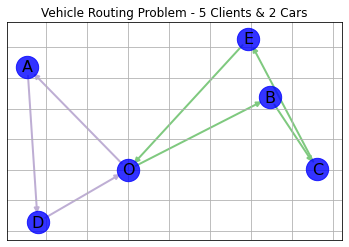

In [29]:
labels = {
    0 : "O",
    1 : "A",
    2 : "B",
    3 : "C",
    4 : "D",
    5 : "E",
}
fqs.visualize(xc, yc, labels)

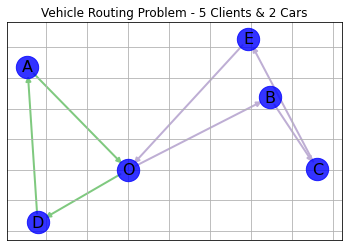

In [20]:
qs.visualize(xc, yc, labels)

In [236]:
def request_handler(request, iteration):
    """
        This function handles a request when it is generated and services it accordingly.
    """
    print('Request generated: ',request)
    
    # loading image and drawing state
    im = Image.open("test-img.png")
    draw = ImageDraw.Draw(im)
    draw_state(draw)
    
    suitable_shuttles = []
    for shuttle in shuttles:
        occupancy = shuttle.occupancy
        src_pt = -1
        dest_pt = -1
        detour = 0
        pos = 0
        #Checking whether occupancy is not full and if the shuttle is already servicing another passenger.
        if shuttle.occupancy < 4 and shuttle.service is False:
            if shuttle.occupancy != 0:
                pos = shuttle.route.index(shuttle.current_position)
                shortest_distance = 999999
                for i in range(pos, pos + 3):
                    if i >= len(shuttle.route):
                        break
                    point = shuttle.route[i]
                    route.generate(point, request[0])
                    print('{}\t{}\t{}\t{}'.format(i, point, request[0], route.distance))
                    if route.distance < 1000:
                        if route.distance > shortest_distance:
                            continue
                        src_pt = i
                        shortest_distance = route.distance
                detour += shortest_distance
                print('Source Point: {}'.format(src_pt))
                if src_pt != -1 :
                    shortest_distance = 999999
                    for j in range(pos, len(shuttle.route)):
                        route.generate(shuttle.route[j],request[1])
                        if route.distance < 1000:
                            if route.distance > shortest_distance:
                                continue
                            shortest_distance = route.distance
                            dest_pt = j
                    detour += shortest_distance
                print('Destination Point: {}'.format(dest_pt))
                if src_pt != -1 and dest_pt != -1 and detour < 2000:
                    suitable_shuttles.append((shuttle, (src_pt, dest_pt)))
            else:
                route.generate(shuttle.current_position, request[0])
                if route.distance <= 3000:
                    suitable_shuttles.append((shuttle, (0,1)))
    if len(suitable_shuttles) == 0:
        print('\nNo suitable shuttles')
        draw_denied_request(draw, request)
#         im.show()
        im.save('{}/Iteration_{}.png'.format(image_folder, iteration + 1))
        return
    print('\nSuitable Shuttles: ')
    for shuttle in suitable_shuttles:
        route.generate(shuttle[0].current_position,request[0])
        print('Distance: {}\t Number: {}\tNumber of Passengers: {}\t\tCurrent Position: {}\t Route : {} \tDrop order: {}'.format(route.distance, shuttle[0].number, shuttle[0].occupancy, shuttle[0].current_position, shuttle[0].route, shuttle[0].drop_order))
    route.generate(suitable_shuttles[0][0].current_position, request[0])
    closest_dist = route.distance
    closest = 0
    # selecting the closest shuttle from the list of suitable shuttles.
    for i in range(1,len(suitable_shuttles)):
        route.generate(suitable_shuttles[i][0].current_position, request[0]) 
        if route.distance < closest_dist:
            closest_dist = route.distance
            closest = i
    selected_shuttle = suitable_shuttles[closest]
    print('Selected Shuttle: ', suitable_shuttles[closest][0].number)
    if len(selected_shuttle[0].passengers) == 0:
        #Use spanning tree algo
        selected_shuttle[0].drop_order.append(request)
        temp = (route.generate(selected_shuttle[0].current_position, request[0]), route.generate(*request))
        selected_shuttle[0].route = join_route(temp[0][:-1], temp[1])
        selected_shuttle[0].index = 0
        if selected_shuttle[0].current_position == request[0]:
            selected_shuttle[0].passengers.append(Passenger(passenger_id_generator(), request, selected_shuttle[0].number))
            selected_shuttle[0].occupancy += 1
            print('Passenger picked up at {} by shuttle {}'.format(request[0], selected_shuttle[0].number))
            
            #draw new route
            draw_route(draw, temp[1], current_route_color[shuttle_index[selected_shuttle[0].number]])
        else:
            selected_shuttle[0].pickup = request
            selected_shuttle[0].service = True
            draw_route(draw, temp[0], branch_color[shuttle_index[selected_shuttle[0].number]])
            draw_route(draw, temp[1], current_route_color[shuttle_index[selected_shuttle[0].number]])
    else:
        src_pt = selected_shuttle[1][0]
        dest_pt = selected_shuttle[1][1]
        drop_list = [node for node in selected_shuttle[0].drop_order]
        flag = False
        insert_index = 0
        for i in range(len(drop_list)):
            if dest_pt < selected_shuttle[0].route.index(drop_list[i][1]):
                drop_list.insert(i,request)
                insert_index = i
                flag = True
                break
        if not flag:
            insert_index = len(drop_list)
            drop_list.append(request)  
        selected_shuttle[0].drop_order = [order for order in drop_list]
        new_route = selected_shuttle[0].route[:src_pt]
        
        # draw old route
        draw_route(draw, selected_shuttle[0].route, old_route_color[shuttle_index[selected_shuttle[0].number]])
        
       
        branch_route = route.generate(selected_shuttle[0].route[src_pt], request[0])
        new_route = join_route(new_route, branch_route[:-1])
           
        drop_first = False
        for i in range(insert_index):
            if selected_shuttle[0].route.index(drop_list[i][1]) > src_pt:
                drop_first = True
                break
        drop_list = drop_list[i if drop_first else insert_index:]
        join_index = len(new_route)
        new_route = join_route(new_route, route.generate(request[0], drop_list[0][1])[:-1])
        for i in range(1,len(drop_list)):
            new_route = join_route(new_route, route.generate(drop_list[i-1][1],drop_list[i][1])[:-1])  
        new_route.append(drop_list[-1][1])
        selected_shuttle[0].route = new_route
        #draw new route
        draw_route(draw, new_route[join_index:], current_route_color[shuttle_index[selected_shuttle[0].number]])
        
        if selected_shuttle[0].current_position == request[0]:
            selected_shuttle[0].passengers.insert(insert_index, Passenger(passenger_id_generator(), request, selected_shuttle[0].number))
            selected_shuttle[0].occupancy += 1
            print('Passenger picked up at {} by shuttle {}'.format(request[0], selected_shuttle[0].number))
        else:
            selected_shuttle[0].pickup = request
            selected_shuttle[0].service = True
            
            # draw branch route
            draw_route(draw, branch_route, branch_color[shuttle_index[selected_shuttle[0].number]])
#     im.show()
    im.save('{}/Iteration_{}.png'.format(image_folder, iteration + 1))

In [37]:
class Shuttle:
    def __init__(self, number, passengers, route, drop_order = []):
        self.number = number
        self.passengers = passengers
        self.current_position = route[0]
        self.index = 0
        self.route = route
        self.drop_order = drop_order
        self.occupancy = len(self.passengers)
        self.service = False
        self.pickup = None
        
    def details(self):
        print('Number: {}\tNumber of Passengers: {}\t\tCurrent Position: {}\t Route : {} \tDrop order: {}'.format(self.number, self.occupancy, self.current_position, self.route, self.drop_order))

In [26]:
class Passenger:
    def __init__(self, pass_id, request, shuttle_number):
        self.id = passenger_id 
        self.request = request
        self.shuttle_number = shuttle_number
        
    def details(self):
        print('ID: {}\tRequest Info: {}\t Shuttle Number: {}'.format(self.id, self.request, self.shuttle_number))

In [27]:
def passenger_id_generator():
    '''
        This function generates a random passenger id.
    '''
    id = 'P'
    for i in range(3):
        id += str(random.randrange(10))
    for i in range(2):
        id += chr(random.randrange(65,91))
    for i in range(4):
        id += str(random.randrange(10))
    return id

In [28]:
def shuttle_number_generator():
    '''
        This function randomly generates a car number.
    '''
    number = 'WB'
    for i in range(2):
        number += str(random.randrange(10))
    number += chr(random.randrange(65,91))
    for i in range(4):
        number += str(random.randrange(10))
    return number

In [211]:
circle_size = 5
offset = 10

start_color = (255, 255, 255)
branch_color = [(0, 255, 0), (0, 255, 255)]
current_route_color = [(173, 255, 47), (30, 144, 255)]
old_route_color = [(8, 105, 114), (135, 206, 250)]
drop_node_color = [(0, 100, 0), (180, 0, 180)]
current_position_color = [(0, 250, 154), (123, 104, 238)]

denied_request_color = [(255, 0, 0), (255, 0, 255)]

image_folder = 'random'

In [153]:
im = Image.open("test-img.png")

draw = ImageDraw.Draw(im)

for i in range(m):

    for j in range(1, len(shuttles[i].route)):
        draw.line((image_coordinates[shuttles[i].route[j-1]][0], image_coordinates[shuttles[i].route[j-1]][1], image_coordinates[shuttles[i].route[j]][0], image_coordinates[shuttles[i].route[j]][1]), current_route_color[i], width=5)
    for req in shuttles[i].drop_order:
        draw.ellipse((image_coordinates[req[1]][0] - circle_size, image_coordinates[req[1]][1] - circle_size, image_coordinates[req[1]][0] + circle_size, image_coordinates[req[1]][1] + circle_size), fill= drop_node_color[i], outline=(0, 0, 0))

draw.ellipse((image_coordinates[center][0] - circle_size, image_coordinates[center][1] - circle_size, image_coordinates[center][0] + circle_size, image_coordinates[center][1] + circle_size), fill= (255, 255, 255), outline=(0, 0, 0))
#Show image
im.show()

In [176]:
def draw_state(draw):
    for i in range(m):
        for j in range(1, len(shuttles[i].route)):
            draw.line((image_coordinates[shuttles[i].route[j-1]][0], image_coordinates[shuttles[i].route[j-1]][1], image_coordinates[shuttles[i].route[j]][0], image_coordinates[shuttles[i].route[j]][1]), current_route_color[i], width=5)
        for req in shuttles[i].drop_order:
            draw.ellipse((image_coordinates[req[1]][0] - circle_size, image_coordinates[req[1]][1] - circle_size, image_coordinates[req[1]][0] + circle_size, image_coordinates[req[1]][1] + circle_size), fill= drop_node_color[i], outline=(0, 0, 0))
        draw.ellipse((image_coordinates[shuttles[i].current_position][0] - circle_size, image_coordinates[shuttles[i].current_position][1] - circle_size, image_coordinates[shuttles[i].current_position][0] + circle_size, image_coordinates[shuttles[i].current_position][1] + circle_size), fill= current_position_color[i], outline=(0, 0, 0))

    draw.ellipse((image_coordinates[center][0] - circle_size, image_coordinates[center][1] - circle_size, image_coordinates[center][0] + circle_size, image_coordinates[center][1] + circle_size), fill= (255, 255, 255), outline=(0, 0, 0))

In [177]:
def draw_route(draw, route, color):
    for i in range(1, len(route)):
        draw.line((image_coordinates[route[i-1]][0], image_coordinates[route[i-1]][1], image_coordinates[route[i]][0], image_coordinates[route[i]][1]), color, width=5)

In [190]:
def draw_denied_request(draw, request):
    circle_size = 10
    for i in range(2):
        draw.ellipse((image_coordinates[request[i]][0] - circle_size, image_coordinates[request[i]][1] - circle_size, image_coordinates[request[i]][0] + circle_size, image_coordinates[request[i]][1] + circle_size), fill= denied_request_color[i], outline=(0, 0, 0))

In [233]:
test_cases = [(90, 10), (66, 28), (83,43), (110, 84), (99, 7), (99,2), (15, 28), (60, 9), (32,4), (42, 15), (77, 28), (114,15), (43,40), (51, 79), (108, 0), (118, 90), (15, 3), (22, 6), (26, 70), (37,26), (101, 79), (58, 56), (106, 15), (77, 102), (23, 81), (112, 6), (2, 80), (116, 118), (119, 34), (81, 37)] 
def generate_request():
    if test_cases:
        val = test_cases.pop(0)
    else: val = ''
    if val == '': 
        return (116,118) 
    else: return val
print(len(test_cases))

30


In [221]:
for i in range(len(test_cases) + 5):
    print(generate_request())

(90, 10)
(66, 28)
(83, 43)
(110, 84)
(99, 7)
(99, 2)
(15, 28)
(60, 9)
(32, 4)
(42, 15)
(77, 28)
(114, 15)
(43, 40)
(51, 79)
(108, 0)
(118, 90)
(15, 3)
(22, 6)
(26, 70)
(37, 26)
(101, 79)
(58, 56)
(106, 15)
(77, 102)
(23, 81)
(112, 6)
(2, 80)
(116, 118)
(116, 118)
(116, 118)
(116, 118)
(116, 118)
(116, 118)


In [234]:
shuttles = []
shuttle_index = {}
# Generating the initial state
# In the inital state the car is randomly given passengers and the corresponding route is generated.
# Then a simulation is run for fifty iterations, in which the car is consider to move to the next node in its route in every iteration.
# There is only one request generated per iteration, which is handled accordingly.
for i in range(m):
    # Initial car and passenger initiation
    shuttle_number = shuttle_number_generator()
    shuttle_index[shuttle_number] = i
    current_passengers = []
    path, drop_order = cluster_route(center,clusters[i])
    for drop_request in drop_order:
        passenger_id = passenger_id_generator()
        current_passengers.append(Passenger(passenger_id, drop_request, shuttle_number))
    shuttles.append(Shuttle(shuttle_number, current_passengers, path, drop_order))
    shuttles[i].details()
    for passenger in current_passengers:
        passenger.details()

im = Image.open("test-img.png")
draw = ImageDraw.Draw(im)
draw_state(draw)
# im.show()
im.save('{}/initial.png'.format(image_folder))

Number: WB78C2237	Number of Passengers: 3		Current Position: 86	 Route : [86, 85, 84, 71, 55, 41, 20, 21, 20, 19, 18, 13] 	Drop order: [(86, 20), (86, 21), (86, 13)]
ID: P699OO1983	Request Info: (86, 20)	 Shuttle Number: WB78C2237
ID: P404ZP8866	Request Info: (86, 21)	 Shuttle Number: WB78C2237
ID: P386XN5739	Request Info: (86, 13)	 Shuttle Number: WB78C2237
Number: WB24S1026	Number of Passengers: 2		Current Position: 86	 Route : [86, 87, 97, 100, 98, 99, 98, 65, 64, 31, 30, 29] 	Drop order: [(86, 99), (86, 29)]
ID: P982GB7926	Request Info: (86, 99)	 Shuttle Number: WB24S1026
ID: P529FZ7190	Request Info: (86, 29)	 Shuttle Number: WB24S1026


In [235]:
print('\n\t###Simulation Starting###\n')
for i in range(30):
    print('\nIteration ', i+1)
    for shuttle in shuttles:
        if shuttle.route != [] and shuttle.index < len(shuttle.route) - 1:
            shuttle.index += 1
            shuttle.current_position = shuttle.route[shuttle.index]
        for drop_request in shuttle.drop_order:
            if drop_request == shuttle.pickup:
                continue
#             if drop_request[1] != shuttle.current_position:
#                 break
            if drop_request[1] == shuttle.current_position:
                shuttle.drop_order.remove(drop_request)
                shuttle.passengers.pop(0)
                shuttle.occupancy -= 1
                print('Passenger dropped up at {} by car {}'.format(shuttle.current_position, shuttle.number))
        if shuttle.drop_order == []:
            shuttle.route = []
            shuttle.index = -1
        if shuttle.service is True and shuttle.current_position == shuttle.pickup[0]:
# Change print statement            
            print(shuttle.passengers)
            shuttle.passengers.insert(shuttle.drop_order.index(shuttle.pickup), Passenger(passenger_id_generator(), shuttle.pickup, shuttle.number))
            shuttle.occupancy += 1
            print('Passenger picked up at {} by car {}'.format(shuttle.pickup[0], shuttle.number))
            shuttle.service = False
            shuttle.pickup = None
#     request = request_generator()
    request = generate_request()
    request_handler(request, i)    
    print('\n')
    for shuttle in shuttles:
        print('Number: {}\tNumber of Passengers: {}\t\tCurrent Position: {}\t Route : {} \tDrop order: {}\t Service: {}\t Pickup: {}'.format(shuttle.number, shuttle.occupancy, shuttle.current_position, shuttle.route, shuttle.drop_order, shuttle.service, shuttle.pickup))
#     if(int(input('Continue? ')) == 0):
#         print('\n\t###Simulation Stopped###\n')
#         break


	###Simulation Starting###


Iteration  1
Request generated:  (90, 10)
1	85	90	493
2	84	90	843
3	71	90	1270
Source Point: 1
Destination Point: 7
1	87	90	807
2	97	90	1069
3	100	90	1503
Source Point: 1
Destination Point: -1

Suitable Shuttles: 
Distance: 493	 Number: WB78C2237	Number of Passengers: 3		Current Position: 85	 Route : [86, 85, 84, 71, 55, 41, 20, 21, 20, 19, 18, 13] 	Drop order: [(86, 20), (86, 21), (86, 13)]
Selected Shuttle:  WB78C2237


Number: WB78C2237	Number of Passengers: 3		Current Position: 85	 Route : [86, 85, 90, 85, 84, 71, 55, 41, 20, 21, 10, 11, 12, 13] 	Drop order: [(86, 20), (86, 21), (90, 10), (86, 13)]	 Service: True	 Pickup: (90, 10)
Number: WB24S1026	Number of Passengers: 2		Current Position: 87	 Route : [86, 87, 97, 100, 98, 99, 98, 65, 64, 31, 30, 29] 	Drop order: [(86, 99), (86, 29)]	 Service: False	 Pickup: None

Iteration  2
[<__main__.Passenger object at 0x000001F935220310>, <__main__.Passenger object at 0x000001F9352209D0>, <__main__.Passenger obj

13	28	43	3912
14	2	43	4190
15	3	43	3983
Source Point: -1
Destination Point: -1

Suitable Shuttles: 
Distance: 516	 Number: WB78C2237	Number of Passengers: 0		Current Position: 13	 Route : [] 	Drop order: []
Selected Shuttle:  WB78C2237


Number: WB78C2237	Number of Passengers: 0		Current Position: 13	 Route : [13, 18, 43, 42, 41, 40] 	Drop order: [(43, 40)]	 Service: True	 Pickup: (43, 40)
Number: WB24S1026	Number of Passengers: 2		Current Position: 28	 Route : [86, 87, 97, 66, 65, 98, 99, 98, 65, 64, 31, 32, 29, 28, 2, 3, 4] 	Drop order: [(99, 2), (32, 4)]	 Service: False	 Pickup: None

Iteration  14
Passenger dropped up at 2 by car WB24S1026
Request generated:  (51, 79)
14	2	51	3643
15	3	51	3442
16	4	51	3026
Source Point: -1
Destination Point: -1

No suitable shuttles


Number: WB78C2237	Number of Passengers: 0		Current Position: 18	 Route : [13, 18, 43, 42, 41, 40] 	Drop order: [(43, 40)]	 Service: True	 Pickup: (43, 40)
Number: WB24S1026	Number of Passengers: 1		Current Position: 2

3	38	116	3918
4	57	116	3568
5	70	116	3343
Source Point: -1
Destination Point: -1
9	60	116	4075
10	69	116	3853
11	70	116	3343
Source Point: -1
Destination Point: -1

No suitable shuttles


Number: WB78C2237	Number of Passengers: 1		Current Position: 38	 Route : [6, 24, 23, 38, 57, 70, 71, 72, 73, 51, 50, 76, 81] 	Drop order: [(23, 81)]	 Service: False	 Pickup: None
Number: WB24S1026	Number of Passengers: 1		Current Position: 60	 Route : [4, 26, 35, 36, 37, 36, 35, 26, 35, 60, 69, 70] 	Drop order: [(26, 70)]	 Service: False	 Pickup: None

Iteration  29
Request generated:  (119, 34)
4	57	119	4131
5	70	119	3906
6	71	119	3351
Source Point: -1
Destination Point: -1
10	69	119	3607
11	70	119	3906
Source Point: -1
Destination Point: -1

No suitable shuttles


Number: WB78C2237	Number of Passengers: 1		Current Position: 57	 Route : [6, 24, 23, 38, 57, 70, 71, 72, 73, 51, 50, 76, 81] 	Drop order: [(23, 81)]	 Service: False	 Pickup: None
Number: WB24S1026	Number of Passengers: 1		Current Position:

In [206]:
for shuttle in shuttles:
    print(shuttle.number)
    
print(shuttles.index('WB53L6912'))

WB89K0684
WB53L6912


ValueError: 'WB53L6912' is not in list

In [35]:
def request_generator():
    """
        This function generates a request randomly.
    """
    src = random.randrange(total_nodes)
    dest = random.randrange(total_nodes)
    while src == dest:
        dest = random.randrange(total_nodes)
    return (src, dest)

In [ ]:
shuttles = []
# Generating the initial state
# In the inital state the car is randomly given passengers and the corresponding route is generated.
# Then a simulation is run for fifty iterations, in which the car is consider to move to the next node in its route in every iteration.
# There is only one request generated per iteration, which is handled accordingly.
for i in range(50):
    shuttle_number = car_number_generator()
    number_of_current_passengers = random.randrange(5)
    current_passengers = []
    path, drop_order = cluster_route(center,clusters[i])
    if number_of_current_passengers == 0:
        current_position = random.randrange(total_nodes)
        index = -1
    else:
        pass_id = passenger_id_generator()
        request = request_generator()
        current_passengers.append(Passenger(pass_id, request, car_number))
        route = random.choice(GA(*request))
        pick_order = [request]
        drop_order = [request]
        while len(current_passengers) < number_of_current_passengers:
            request = request_generator()
            new_route = valid_request_mod(request, route, pick_order, drop_order)
            if new_route is not None:
                route = new_route
                pass_id = passenger_id_generator()
                current_passengers.append(Passenger(pass_id, request, car_number))
        if number_of_current_passengers == 1:
            index = random.randrange(len(route))
            current_position = route[index]
        else:
            connect_route = astar(pick_order[-1][0],drop_order[0][1])
            current_position = random.choice(connect_route)
            index = route.index(current_position)
    cars.append(Car(car_number, current_passengers, current_position, index, route, drop_order))
for car in cars:
    print('Number: {}\tNumber of Passengers: {}\t\tCurrent Position: {}\t Route : {} \tDrop order: {}'.format(car.number, len(car.passengers), car.current_position, car.route, car.drop_order))
    if len(car.passengers) > 0:
        for passenger in car.passengers:
            print('ID: {}\tRequest Info: {}\t Car Number: {}'.format(passenger.id, passenger.request, passenger.car_number))

for car in cars:
    for item in car.drop_order:
        if item == car.pickup:
                continue
        if item[1] == car.current_position:
            car.drop_order.remove(item)
            pass_pos = -1
            for p in range(len(car.passengers)):
                if car.passengers[p].request == item:
                    pass_pos = p
                    break
            if pass_pos != -1:
                car.passengers.remove(car.passengers[pass_pos])
            print('Passenger dropped up at {} by car {}'.format(car.current_position, car.number))
    if car.drop_order == []:
            car.route = []
            car.index = -1
# Showing simulation for 50 iterations            
for i in range(50):
    print('\nIteration ',i+1)
    for car in cars:
        if car.route != [] and car.index < len(car.route) - 1:
            car.index = car.index + 1
            car.current_position = car.route[car.index]
        for item in car.drop_order:
            if item == car.pickup:
                continue
            if item[1] == car.current_position:
                car.drop_order.remove(item)
                pass_pos = -1
                for p in range(len(car.passengers)):
                    if car.passengers[p].request == item:
                        pass_pos = p
                        break
                if pass_pos != -1:
                    car.passengers.remove(car.passengers[pass_pos])
                print('Passenger dropped up at {} by car {}'.format(car.current_position, car.number))
        if car.drop_order == []:
            car.route = []
            car.index = -1
        if car.service is True and car.current_position == car.pickup[0]:
#             print(car.passengers)
            car.passengers.append(Passenger(passenger_id_generator(), car.pickup, car.number))
            print('Passenger picked up at {} by car {}'.format(car.pickup[0], car.number))
#             print(car.passengers)
            car.service = False
            car.pickup = None
    request = request_generator()
    request_handler(request)    
    print('\n')
    for car in cars:
        print('Number: {}\tNumber of Passengers: {}\t\tCurrent Position: {}\t Route : {} \tDrop order: {}\t Service: {}\t Pickup: {}'.format(car.number, len(car.passengers), car.current_position, car.route, car.drop_order, car.service, car.pickup))

In [25]:

locs = [
    (22.565923, 88.368951),
    (22.57276655444997, 88.38948573982795),
    (22.54077163135614, 88.3963315562282),
    (22.518144017282523, 88.34885076420595),
    (22.546356896470648, 88.34243962154214),
]
xs = np.zeros(6)
ys = np.zeros(6)
ys[0] = coordinates[0]['latitude']
xs[0] = coordinates[0]['longitude']

for i in range(1,6):
    ys[i] = (coordinates[requests[i-1]]['latitude'] - ys[0]) * 500
    xs[i] = (coordinates[requests[i-1]]['longitude'] - xs[1]) * 500

print(xs)
print(ys)

[ 8.83949551e+01  4.42064548e+04 -2.20590195e+07 -2.20590189e+07
 -2.20590142e+07 -2.20590202e+07]
[ 22.59257785   1.665265   -11.276345    -9.8703       0.41377
  -6.399395  ]


In [3]:
instance, xc, yc = utility.generate_vrp_instance(n, seed)

In [4]:
print(instance)
print(xc)
print(yc)

[[ 0.          4.27004888  3.03023376 26.01875627  6.82521534 10.89540557]
 [ 4.27004888  0.         11.34000725 50.87753159  1.37726708 28.08723873]
 [ 3.03023376 11.34000725  0.         16.15307858 17.73198146  4.76500506]
 [26.01875627 50.87753159 16.15307858  0.         58.76742563  3.44295045]
 [ 6.82521534  1.37726708 17.73198146 58.76742563  0.         34.83384593]
 [10.89540557 28.08723873  4.76500506  3.44295045 34.83384593  0.        ]]
[ 0.51003914  2.55963937 -0.64283509 -4.57068577  2.98724481 -2.72584275]
[ 1.05534574  0.79231007 -0.24892217  0.60258683  1.88520561  0.40382905]


In [5]:
variables = np.array([[['x.{}.{}.{}'.format(i, j, k) for k in range(1, n + 1)]
                                    for j in range(n + 1)] for i in range(1, m + 1)])
print(variables)
print(variables[1,2,3])

[[['x.1.0.1' 'x.1.0.2' 'x.1.0.3' 'x.1.0.4' 'x.1.0.5']
  ['x.1.1.1' 'x.1.1.2' 'x.1.1.3' 'x.1.1.4' 'x.1.1.5']
  ['x.1.2.1' 'x.1.2.2' 'x.1.2.3' 'x.1.2.4' 'x.1.2.5']
  ['x.1.3.1' 'x.1.3.2' 'x.1.3.3' 'x.1.3.4' 'x.1.3.5']
  ['x.1.4.1' 'x.1.4.2' 'x.1.4.3' 'x.1.4.4' 'x.1.4.5']
  ['x.1.5.1' 'x.1.5.2' 'x.1.5.3' 'x.1.5.4' 'x.1.5.5']]

 [['x.2.0.1' 'x.2.0.2' 'x.2.0.3' 'x.2.0.4' 'x.2.0.5']
  ['x.2.1.1' 'x.2.1.2' 'x.2.1.3' 'x.2.1.4' 'x.2.1.5']
  ['x.2.2.1' 'x.2.2.2' 'x.2.2.3' 'x.2.2.4' 'x.2.2.5']
  ['x.2.3.1' 'x.2.3.2' 'x.2.3.3' 'x.2.3.4' 'x.2.3.5']
  ['x.2.4.1' 'x.2.4.2' 'x.2.4.3' 'x.2.4.4' 'x.2.4.5']
  ['x.2.5.1' 'x.2.5.2' 'x.2.5.3' 'x.2.5.4' 'x.2.5.5']]]
x.2.2.4


In [6]:
obj_linear_a = {variables[a, b, 0]: instance[0, b] for a in range(m) for b in range(1, n + 1)}
obj_linear_b = {variables[a, b, -1]: instance[b, 0] for a in range(m) for b in range(1, n + 1)}
print(obj_linear_a)
print(obj_linear_b)

{'x.1.1.1': 4.270048879604721, 'x.1.2.1': 3.0302337646881803, 'x.1.3.1': 26.018756268033645, 'x.1.4.1': 6.825215339954393, 'x.1.5.1': 10.895405571795322, 'x.2.1.1': 4.270048879604721, 'x.2.2.1': 3.0302337646881803, 'x.2.3.1': 26.018756268033645, 'x.2.4.1': 6.825215339954393, 'x.2.5.1': 10.895405571795322}
{'x.1.1.5': 4.270048879604721, 'x.1.2.5': 3.0302337646881803, 'x.1.3.5': 26.018756268033645, 'x.1.4.5': 6.825215339954393, 'x.1.5.5': 10.895405571795322, 'x.2.1.5': 4.270048879604721, 'x.2.2.5': 3.0302337646881803, 'x.2.3.5': 26.018756268033645, 'x.2.4.5': 6.825215339954393, 'x.2.5.5': 10.895405571795322}


In [7]:
center = (22.549134075168105, 88.35608616688717)
locs = [
    (22.565923, 88.368951),
    (22.57276655444997, 88.38948573982795),
    (22.54077163135614, 88.3963315562282),
    (22.518144017282523, 88.34885076420595),
    (22.546356896470648, 88.34243962154214),
]
labels = {
    0 : "St. Xavier's College",
    1 : "Sealdah",
    2 : "Phoolbagan",
    3 : "Science City",
    4 : "Lake Mall",
    5 : "Victoria Memorial",
}
xs = np.zeros(6)
ys = np.zeros(6)
i = 1
for loc in locs:
    ys[i] = (loc[0] - center[0]) * 500
    xs[i] = (loc[1] - center[1]) * 500
    i += 1

print(xs)
print(ys)

[ 0.          6.43241656 16.69978647 20.12269467 -3.61770134 -6.82327267]
[  0.           8.39446242  11.81623964  -4.18122191 -15.49502894
  -1.38858935]


In [8]:
inst = np.zeros((n + 1, n + 1))
for ii in range(6):
        for jj in range(ii + 1, 6):
            inst[ii, jj] = (xs[ii] - xs[jj]) ** 2 + (ys[ii] - ys[jj]) ** 2
            inst[jj, ii] = inst[ii, jj]
        
print(inst)

[[   0.          111.84298201  418.50638741  422.40545743  253.18368493
    48.48523034]
 [ 111.84298201    0.          117.12744433  345.57155101  671.71266712
   271.42139876]
 [ 418.50638741  117.12744433    0.          267.63507649 1158.7057026
   727.70182009]
 [ 422.40545743  345.57155101  267.63507649    0.          691.60863243
   733.88395265]
 [ 253.18368493  671.71266712 1158.7057026   691.60863243    0.
   209.26732558]
 [  48.48523034  271.42139876  727.70182009  733.88395265  209.26732558
     0.        ]]


In [9]:
fqs = FullQuboSolver(n, m, inst)
fqs.solve(solver='leap')

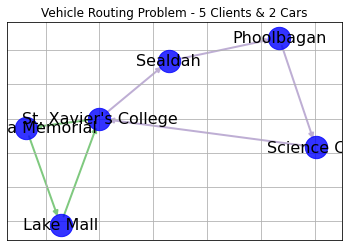

In [10]:
fqs.visualize(xs, ys, labels)

In [91]:
import csv

image_coordinates = []
with open('image-xy.csv', newline='') as csvfile:
    data = csv.reader(csvfile, delimiter=',')
    for row in data:
        image_coordinates.append(tuple(map(int,row)))
#         print(', '.join(row))
print(image_coordinates)

[(143, 109), (180, 109), (220, 109), (261, 109), (323, 123), (368, 122), (436, 144), (492, 201), (507, 226), (511, 271), (510, 319), (514, 380), (496, 428), (492, 469), (490, 530), (474, 583), (451, 548), (428, 507), (472, 464), (470, 428), (470, 379), (474, 318), (475, 269), (461, 239), (395, 187), (370, 162), (318, 159), (257, 160), (215, 159), (174, 157), (141, 156), (136, 196), (176, 194), (217, 194), (258, 195), (320, 195), (354, 199), (373, 215), (416, 267), (435, 283), (432, 321), (433, 381), (430, 427), (431, 465), (390, 485), (398, 510), (435, 561), (462, 611), (438, 625), (410, 575), (373, 526), (362, 465), (392, 464), (394, 428), (392, 409), (394, 378), (396, 318), (395, 297), (345, 243), (334, 232), (318, 237), (255, 235), (215, 236), (175, 235), (125, 236), (129, 265), (175, 263), (217, 264), (256, 265), (322, 265), (368, 314), (365, 380), (363, 409), (365, 430), (313, 471), (305, 491), (336, 546), (367, 602), (401, 653), (370, 681), (334, 623), (302, 570), (271, 492), (31